In [64]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

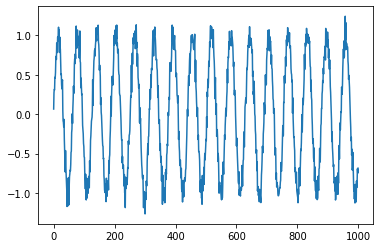

In [86]:
series = np.sin(0.1*np.arange(1000)) + np.random.randn(1000)*0.1
plt.plot(series);

In [87]:
T = 10
D = 1
X = []
Y = []

for t in range(len(series)-T):
  X.append(series[t:t+T])
  Y.append(series[t+T])

X = np.array(X).reshape(-1, T, D)
Y = np.array(Y)
N = X.shape[0]

print('X shape:', X.shape, ', Y shape:', Y.shape)

X shape: (990, 10, 1) , Y shape: (990,)


In [88]:
i = Input((T,D))
x = SimpleRNN(15, activation='relu')(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(loss='mse', optimizer=Adam(learning_rate=0.001))

idx = -N//2
history = model.fit(X[:idx], Y[:idx], epochs=80, validation_data=(X[idx:], Y[idx:]));

Epoch 1/80
16/16 [==============================] - 1s 21ms/step - loss: 0.4749 - val_loss: 0.3263
Epoch 2/80
16/16 [==============================] - 0s 6ms/step - loss: 0.2541 - val_loss: 0.1970
Epoch 3/80
16/16 [==============================] - 0s 8ms/step - loss: 0.1637 - val_loss: 0.1366
Epoch 4/80
16/16 [==============================] - 0s 5ms/step - loss: 0.1186 - val_loss: 0.1028
Epoch 5/80
16/16 [==============================] - 0s 5ms/step - loss: 0.0887 - val_loss: 0.0758
Epoch 6/80
16/16 [==============================] - 0s 8ms/step - loss: 0.0649 - val_loss: 0.0516
Epoch 7/80
16/16 [==============================] - 0s 6ms/step - loss: 0.0428 - val_loss: 0.0339
Epoch 8/80
16/16 [==============================] - 0s 8ms/step - loss: 0.0313 - val_loss: 0.0290
Epoch 9/80
16/16 [==============================] - 0s 6ms/step - loss: 0.0281 - val_loss: 0.0261
Epoch 10/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0257 - val_loss: 0.0240
Epoch 11/80
16/16 

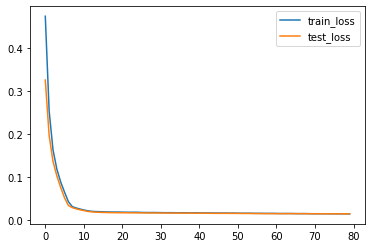

In [89]:
plt.plot(history.history['loss'], label='train_loss');
plt.plot(history.history['val_loss'], label='test_loss');
plt.legend();

In [90]:
# one step predictions
validation_target = Y[idx:]
validation_predictions = []

for t in X[idx:]:
  prediction = model.predict(t.reshape(1,T,D))
  validation_predictions.append(prediction[0,0])

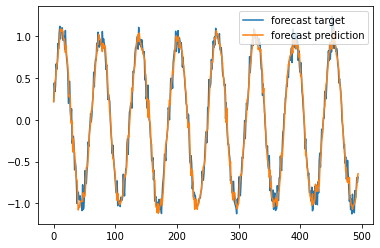

In [91]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend();

In [92]:
# future forecast predictions
validation_target = Y[idx:]
validation_predictions = []

x = X[idx]
for t in X[idx:]:
  prediction = model.predict(x.reshape(1,T,D))
  validation_predictions.append(prediction[0,0])
  x[:-1,:] = x[1:,:]
  x[-1,:] = prediction

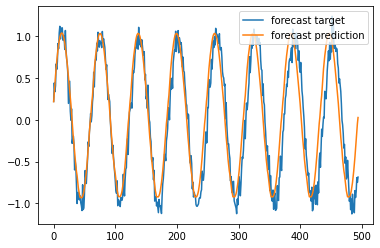

In [93]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend();